In [1]:
import pandas as pd

df = pd.read_csv('stocks/TSLA_3years.csv', index_col=0)
date = df.index.values
df.index = pd.to_datetime(df.index, yearfirst=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2023-01-24,143.000000,146.500000,141.100006,143.889999,143.889999,158699100
2023-01-25,141.910004,146.410004,138.070007,144.429993,144.429993,192734300
2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100


In [2]:
total_data_num = len(df)
over_100 = len(df[df['Close'] >= 200])
total_data_num, over_100

(775, 469)

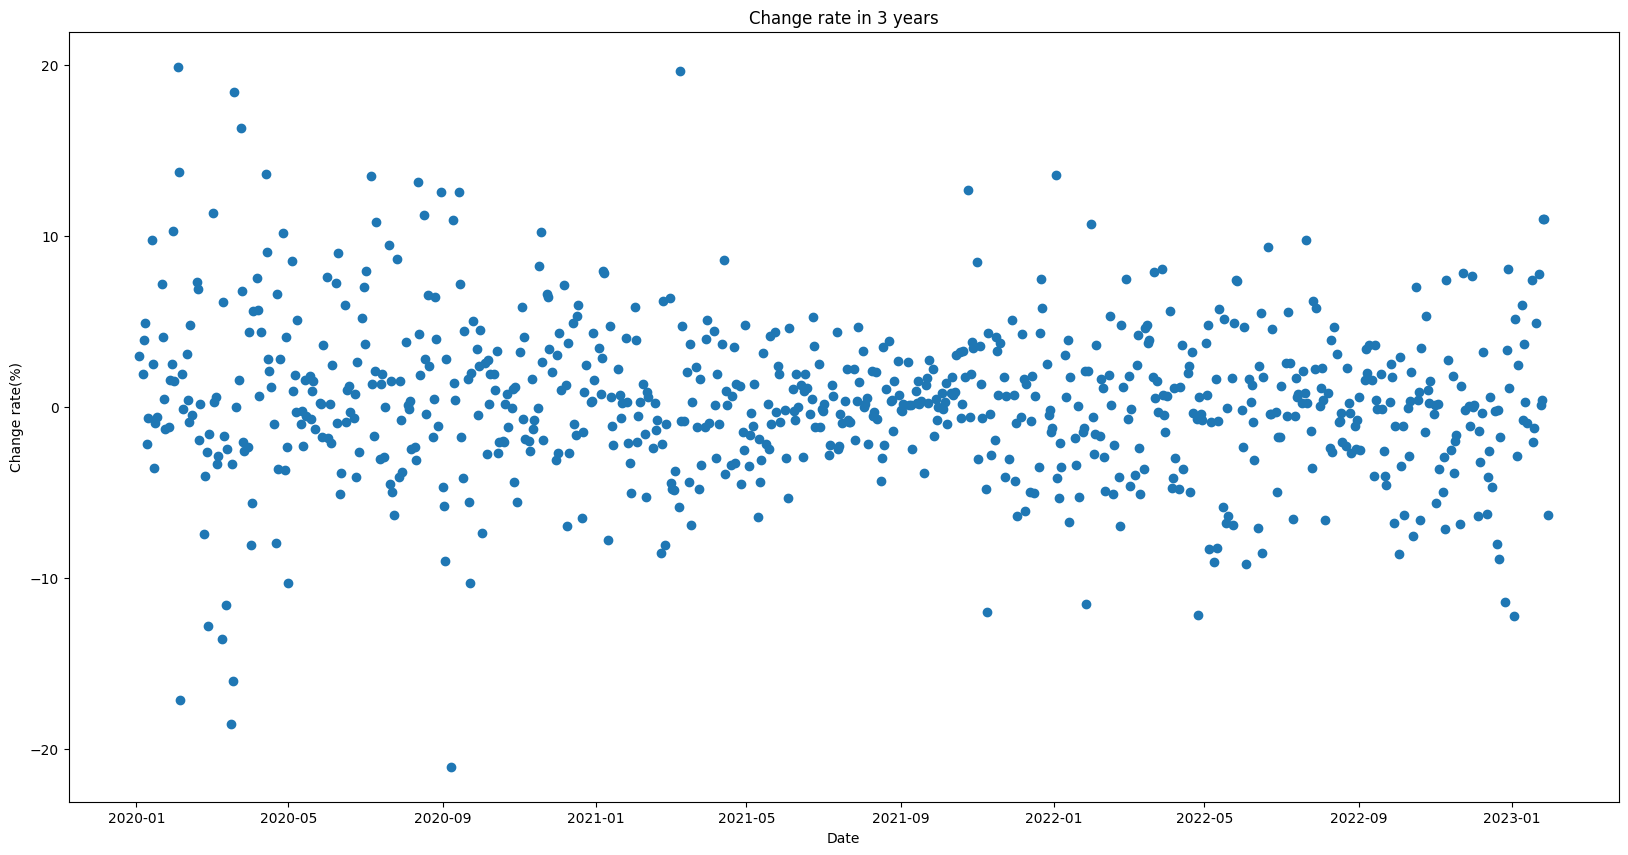

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
close_value = df['Close']
change_rate = []
x_date=[]
for i in range(1, total_data_num):
    ratio = ((close_value[i] - close_value[i-1])/close_value[i-1]) * 100
    change_rate.append(ratio.round(2))
    dates=date[i]
    x_date.append(dates)
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Change rate(%)')
plt.title('Change rate in 3 years')
plt.scatter(df.index[1:], change_rate)
plt.savefig('graphs/change_rate.png')

In [4]:
low_rate = 0
mid_rate = 0
high_rate = 0
below_zero = 0
above_zero = 0
for i in range(0,total_data_num-1):
    value = abs(change_rate[i])
    value2 = change_rate[i]
    if value<5:
        low_rate+=1
    elif value<10:
        mid_rate+=1
    else:
        high_rate+=1
    if value2>0:
        above_zero+=1
    else:
        below_zero+=1
rate = ['low','mid','high']
rate_num = [low_rate, mid_rate, high_rate]

In [5]:
from tkinter import CENTER
from pyecharts.charts import Pie
from pyecharts import options as opts
pie_list =  [[i,j] for i,j in zip(rate,rate_num)]
c =(
    Pie()
    .add("",pie_list,)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Change rate in 3 years"),
    )
)
c.render_notebook()

In [6]:
zero = ['Raise','Release']
zeronum = [above_zero,below_zero]
pie_list =  [[i,j] for i,j in zip(zero,zeronum)]
c =(
    Pie()
    .add("",pie_list,)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Raise or Release in 3 years"),
    )
)
c.render_notebook()

In [7]:
for i in range(total_data_num):
    if abs(change_rate[i]) > 20:
        print(df.index[i], end=' ')

2020-09-04 00:00:00 

IndexError: list index out of range

In [ ]:
df_popular = df.sort_values('Volume', ascending=False)
df_popular.head(20)

In [ ]:
df_highvalue = df[df['Close'] >= 400]
df[]

In [ ]:
volume1 = df['Volume'].values
index1= df['Volume'].index

#成交量分布
plt.figure(figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Volume(%)')
plt.title('Volume in 3 years')
plt.scatter(index1,volume1,marker='*')
plt.show()

In [ ]:
#逐年分析
from pyecharts.charts import Bar
from pyecharts import options as opt
df1 = pd.read_csv('TSLA_3years.csv')
df2 = df1[df1['Date']<='2020-12-31']
df3 = df1[(df1['Date']>'2020-12-31') & (df1['Date']<='2021-12-31')]
df4 = df1[df1['Date']>'2021-12-31']

mean_dict={'Year':[2020,2021,2022],
           'High':[df2['High'].mean(),df3['High'].mean(),df4['High'].mean()], 
           'Low' :[df2['Low'].mean(),df3['Low'].mean(),df4['Low'].mean()]}
mean_dict=pd.DataFrame(mean_dict)
mean_dict=mean_dict.round(2)
c = (
    Bar()
    .add_xaxis(mean_dict['Year'].tolist())
    .add_yaxis("High", mean_dict['High'].tolist(), stack="stack1")
    .add_yaxis("Low", mean_dict['Low'].tolist(), stack="stack2")

    .set_series_opts(
        label_opts=opts.LabelOpts(
            is_show=True, 
            position="inside",
            font_size=10,
            color='#FFFFFF'
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title=""),
        xaxis_opts=opts.AxisOpts(
            type_='category',
        )   
    )
)
 
c.render_notebook()